In [ ]:
import tensorflow as tf
print(tf.__version__)
import zipfile,os
import random
import shutil
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
import numpy as np
from google.colab import files
from keras.preprocessing import image

2.5.0


In [ ]:
! chmod 600 kaggle.json && (ls ~/.kaggle 2>/dev/null || mkdir ~/.kaggle) && mv kaggle.json ~/.kaggle/ && echo 'Done'

Done


In [ ]:
! kaggle datasets download techsash/waste-classification-data
! ls

 98% 417M/427M [00:13<00:00, 26.4MB/s]
100% 427M/427M [00:13<00:00, 33.1MB/s]
sample_data  waste-classification-data.zip


In [ ]:
import zipfile,os
local_zip = 'waste-classification-data.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
base_dir = '/tmp/DATASET'
train = os.path.join(base_dir, 'TRAIN')
test = os.path.join(base_dir, 'TEST')

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.90):
      print("\nReached 90% accuracy so cancelling training!")
      self.model.stop_training = True

In [ ]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')
 
val_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

In [ ]:
train_generator = train_datagen.flow_from_directory(
        train,
        target_size=(150, 150),
        batch_size=20,
        class_mode='categorical')
 
val_generator = val_datagen.flow_from_directory(
        test, 
        target_size=(150, 150),
        batch_size=20,
        class_mode='categorical')

Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 128)      

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
callbacks = myCallback()

iterate_model = model.fit(
      train_generator,
      steps_per_epoch=100, 
      epochs=50, 
      validation_data=val_generator, 
      validation_steps=50,  
      verbose=1,
      callbacks=[callbacks])

Epoch 1/50
100/100 [==============================] - 181s 2s/step - loss: 0.5609 - accuracy: 0.7230 - val_loss: 0.4092 - val_accuracy: 0.8500
Epoch 2/50
100/100 [==============================] - 175s 2s/step - loss: 0.4664 - accuracy: 0.8055 - val_loss: 0.4494 - val_accuracy: 0.8310
Epoch 3/50
100/100 [==============================] - 173s 2s/step - loss: 0.4488 - accuracy: 0.8025 - val_loss: 0.4079 - val_accuracy: 0.8390
Epoch 4/50
100/100 [==============================] - 174s 2s/step - loss: 0.4688 - accuracy: 0.7900 - val_loss: 0.4918 - val_accuracy: 0.7780
Epoch 5/50
100/100 [==============================] - 172s 2s/step - loss: 0.4587 - accuracy: 0.7923 - val_loss: 0.3469 - val_accuracy: 0.8770
Epoch 6/50
100/100 [==============================] - 174s 2s/step - loss: 0.4544 - accuracy: 0.8005 - val_loss: 0.3469 - val_accuracy: 0.9020
Epoch 7/50
100/100 [==============================] - 175s 2s/step - loss: 0.4481 - accuracy: 0.8105 - val_loss: 0.4623 - val_accuracy: 0.8260

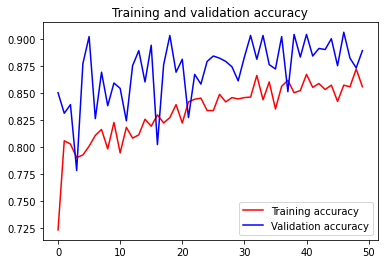

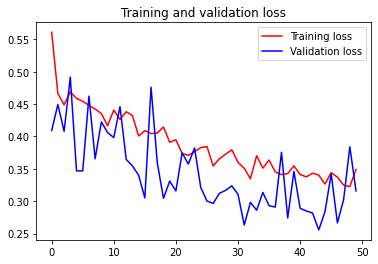

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
acc = iterate_model.history['accuracy']
val_acc = iterate_model.history['val_accuracy']
loss = iterate_model.history['loss']
val_loss = iterate_model.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()

plt.show()

In [ ]:
model.evaluate(val_generator)

126/126 [==============================] - 57s 451ms/step - loss: 0.2921 - accuracy: 0.8886


[0.2921246886253357, 0.8885793685913086]

Saving rec1.jpg to rec1.jpg
Saving rec.jpg to rec.jpg
Saving rec3.jpg to rec3.jpg
Saving rec2.jpg to rec2.jpg
Saving organik5.jpg to organik5.jpg
Saving organik4.jpg to organik4.jpg
Saving organik3.jpg to organik3.jpg
Saving organik2.jpg to organik2.jpg
Saving O_13153.jpg to O_13153.jpg
Saving O_12937.jpg to O_12937.jpg
Saving O_12875.jpg to O_12875.jpg
Saving O_12708.jpg to O_12708.jpg
Saving R_10014.jpg to R_10014.jpg
Saving R_10026.jpg to R_10026.jpg
Saving R_10022.jpg to R_10022.jpg
Saving R_10023.jpg to R_10023.jpg
Saving O_12579.jpg to O_12579.jpg
Saving organik1.jpg to organik1.jpg
rec1.jpg
[[0. 1.]]
Rec
rec.jpg
[[0. 1.]]
Rec
rec3.jpg
[[0. 1.]]
Rec
rec2.jpg
[[0. 1.]]
Rec
organik5.jpg
[[0. 1.]]
Rec
organik4.jpg
[[1. 0.]]
Organic
organik3.jpg
[[0. 1.]]
Rec
organik2.jpg
[[0. 1.]]
Rec
O_13153.jpg
[[1.0000000e+00 5.2703373e-37]]
Organic
O_12937.jpg
[[1.3589606e-04 9.9986410e-01]]
Organic
O_12875.jpg
[[2.1272036e-19 1.0000000e+00]]
Organic
O_12708.jpg
[[9.9997973e-01 2.0270454e-05]]
O

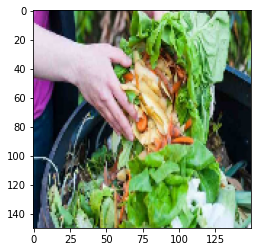

In [ ]:
uploaded = files.upload()

for fn in uploaded.keys():
 
  path = fn
  img = image.load_img(path, target_size=(150, 150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images)

  print(fn)
  print(classes)

  if classes[0][0]:
    print("Organic")
  elif classes[0][1]:
    print("Rec")

In [ ]:
model.save('waste_management3_model.h5')